In [71]:
#without summary without hyperparameter
#after the translation using azure
#the text in the file is not tokenized because fotr GPT3 we don't need tokenization but here is needed

In [72]:
# the file used is of translated text from azure

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
df_translated_without_tokenization= pd.read_csv('/content/drive/My Drive/Master_Thesis/translated_text_preprocessed.csv')
df_translated_without_tokenization


,translated_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1
...,...,...
7726,is that snow,0
7727,moulin rouge mad me cry once again,0
7728,trying to shout but can t find people on the list,0
7729,ughh can t find my red sox hat got ta wear thi...,0


# **#labeling the not summarized text**

**preprocessing steps first**

In [3]:
import string
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Define regular expression pattern to remove URLs
url_pattern = re.compile(r'https?://\S+|www\.\S+')

def preprocessing(text):
    lower_text = text.lower()
    punctuation_free = "".join([chars for chars in lower_text if chars not in string.punctuation])
    remove_urls = url_pattern.sub('', punctuation_free)
    remove_digits = re.sub(r'\d', '', remove_urls)
    tokenized_text = word_tokenize(remove_digits)
    return tokenized_text

# Assuming df_translated_without_tokenization is your input DataFrame with a 'translated_text' column
df_translated_without_tokenization['tokenized_text'] = df_translated_without_tokenization['translated_text'].apply(preprocessing)
df_translated_with_tokenization = df_translated_without_tokenization.copy()

mild_depression = {
    'irritability_or_anger': ['irritability', 'anger', 'frustrated', 'annoyed', 'agitated', 'rageful', 'furious',
                              'irate', 'touchy', 'testy', 'enraged', 'incensed', 'livid', 'wrathful',
                              'infuriated', 'fuming', 'seething', 'outraged', 'raging', 'mad', 'upset'],
    'hopelessness': ['hopelessness', 'despair', 'desperation', 'despondency', 'gloom', 'pessimism'],
    'feelings_of_guilt_and_despair': ['guilt', 'despair', 'remorse', 'regret', 'shame', 'sorrow', 'anguish'],
    'self_loathing': ['self-loathing', 'self-hatred', 'self-disgust', 'self-revulsion', 'self-contempt',
                      'worthless', 'hating oneself', 'valueless'],
    'loss_of_interest_in_activities': ['loss of interest', 'apathy', 'indifference', 'disinterest', 'ennui',
                                       'lethargy', 'unconcern', 'detachment', 'nonchalance', 'unenthusiasm'],
    'difficulties_concentrating_at_work': ['unconcentrated', 'distraction', 'absent-mindedness', 'unfocused', 'confusion', 'bemused'],
    'lack_of_motivation': ['listless', 'apathy', 'lethargy', 'indifference', 'passivity', 'inertia', 'unmotivated', 'lackadaisical'],
    'sudden_disinterest_in_socializing': ['antisociality', 'isolation', 'withdrawal', 'reclusiveness', 'solitude', 'loneliness', 'disconnected', 'detachment'],
    'aches_and_pains_with_no_direct_cause': ['aches', 'pains', 'discomfort', 'soreness', 'twinges', 'throbbing', 'stiffness'],
    'daytime_sleepiness_and_fatigue': ['fatigue', 'tiredness', 'exhaustion', 'weariness', 'drowsiness', 'lethargy'],
    'insomnia': ['insomnia', 'sleeplessness', 'restlessness'],
    'appetite_changes': ['appetite', 'changes', 'dysorexia', 'anorexia', 'overeating', 'fluctuations in appetite', 'irregular eating patterns', 'bulimia', 'gluttony', 'cravings', 'satiety', 'malnutrition', 'voracity'],
    'weight_changes': ['thinner', 'slimmer', 'overweight', 'underweight', 'fatter', 'weight', 'obesify', 'fatten'],
    'reckless_behavior': ['reckless', 'risky', 'dangerous', 'self-destructive', 'risk-taking', 'recklessness', 'impulsivity', 'hazardousness', 'adventurousness', 'venturesomeness', 'temerariousness']
}

moderate_depression = {
    'problems_with_self_esteem': ['self-esteem', 'self-worth', 'self-value', 'self-respect', 'insecurity', 'self-doubt', 'inferiority', 'self-deprecation', 'self-criticism', 'self-worthlessness'],
    'reduced_productivity': ['unproductivity', 'inefficient', 'sluggishness', 'lethargy', 'uneffective', 'unproductive', 'ineptitude', 'ineffectiveness', 'sluggishness', 'inefficacy', 'incompetence', 'inactivity', 'laziness', 'inaptitude', 'inertia', 'languor', 'languish', 'stagnate', 'laze', 'wallow', 'slack'],
    'feelings_of_worthlessness': ['unworthy', 'inadequacy', 'insignificance', 'unworthiness', 'degrade', 'belittle', 'disparage', 'devalue', 'invalidate', 'diminish', 'demean', 'humiliate', 'discredit', 'inferiority', 'futility', 'despondency', 'uselessness', 'insufficiency', 'impotence', 'worthlessness', 'pointlessness', 'invalidity'],
    'increased_sensitivities': ['sensitivity', 'hypersensitivity', 'reactivity', 'hyperesthesia', 'hyperaesthesia', 'hyperresponsiveness', 'overreactivity', 'sensitive'],
    'excessive_worrying': ['worry', 'anxiety', 'concern', 'apprehension', 'stress', 'distress', 'torment', 'fret', 'overthink', 'overanxiety', 'overthinking', 'hyperconcern', 'angst']
}

severe_depression = {
    'delusions': ['hallucinations', 'fantasies', 'illusions', 'misconceptions', 'fantasize', 'imaginate', 'conjure', 'visualize', 'delude', 'illusion', 'daydream'],
    'feelings_of_stupor': ['apathy', 'daze', 'torpor', 'coma', 'stupor', 'lethargy', 'stupification', 'numbedness', 'haze', 'fog', 'languor', 'unaware', 'dullness', 'hibernation', 'inertia', 'languidness', 'somnolence', 'lull', 'unresponsiveness', 'numbness', 'unconscious', 'insensibility', 'oblivion'],
    'hallucinations': ['visions', 'illusions', 'phantoms', 'apparitions'],
    'suicidal_thoughts_or_behaviors': ['suicide', 'self-murder', 'self-harm', 'desperation', 'hopelessness', 'despair', 'self-killing', 'self-fatality', 'self-death']
}

# Function to get synonyms for a word
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
    return synonyms

# Expanding depression keywords with synonyms
def expand_keywords(depression_dict):
    expanded = {}
    for key, keywords in depression_dict.items():
        expanded[key] = set()
        for keyword in keywords:
            expanded[key].update(get_synonyms(keyword))
        expanded[key].update(keywords)  # Ensure original keywords are included
    return expanded

expanding_words_mild = expand_keywords(mild_depression)
expanding_words_moderate = expand_keywords(moderate_depression)
expanding_words_severe = expand_keywords(severe_depression)

lemmatizer = WordNetLemmatizer()

# Function to lemmatize tokens with POS tagging
def lemmatize_tokens(tokens):
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    return lemmas

# Apply lemmatization function to column of dataframe
df_translated_with_tokenization['text_lemmatized'] = df_translated_with_tokenization['tokenized_text'].apply(lemmatize_tokens)

# Function to lemmatize each keyword in a list
def lemmatize_keywords(keywords):
    lemmatized_keywords = []
    for keyword in keywords:
        tokens = word_tokenize(keyword)
        lemmatized_tokens = lemmatize_tokens(tokens)
        lemmatized_keyword = ' '.join(lemmatized_tokens)
        lemmatized_keywords.append(lemmatized_keyword)
    return lemmatized_keywords

lemmatized_mild_depression = {category: lemmatize_keywords(keywords) for category, keywords in mild_depression.items()}
lemmatized_moderate_depression = {category: lemmatize_keywords(keywords) for category, keywords in moderate_depression.items()}
lemmatized_severe_depression = {category: lemmatize_keywords(keywords) for category, keywords in severe_depression.items()}

# Function to assign severity labels
def assign_severity_label(row):
    if row['is_depression'] == 0:
        return 'not depressed'

    lemmatized_text = row['text_lemmatized']

    # Check for severe keywords
    for word in lemmatized_text:
        for key, keywords in expanding_words_severe.items():
            if word in keywords:
                return 'severe'

    # Check for moderate keywords
    for word in lemmatized_text:
        for key, keywords in expanding_words_moderate.items():
            if word in keywords:
                return 'moderate'

    # If no severe or moderate keywords found, label as mild
    return 'mild'

# Assign severity labels to each post
df_translated_with_tokenization['severity_label'] = df_translated_with_tokenization.apply(assign_severity_label, axis=1)

# Display the DataFrame to verify the results
print(df_translated_with_tokenization[['translated_text', 'severity_label']])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                        translated_text severity_label
0     we understand that most people who reply immed...         severe
1     welcome to r depression s check in post a plac...         severe
2     anyone else instead of sleeping more when depr...       moderate
3     i ve kind of stuffed around a lot in my life d...       moderate
4     sleep is my greatest and most comforting escap...           mild
...                                                 ...            ...
7726                                       is that snow  not depressed
7727                 moulin rouge mad me cry once again  not depressed
7728  trying to shout but can t find people on the list  not depressed
7729  ughh can t find my red sox hat got ta wear thi...  not depressed
7730  slept wonderfully finally tried swatching for ...  not depressed

[7731 rows x 2 columns]


In [4]:
# Count the occurrences of each class in the 'severity_label' column
severity_distribution = df_translated_with_tokenization['severity_label'].value_counts()

# Print the distribution
print(severity_distribution)

severity_label
not depressed    3900
severe           1336
mild             1262
moderate         1233
Name: count, dtype: int64


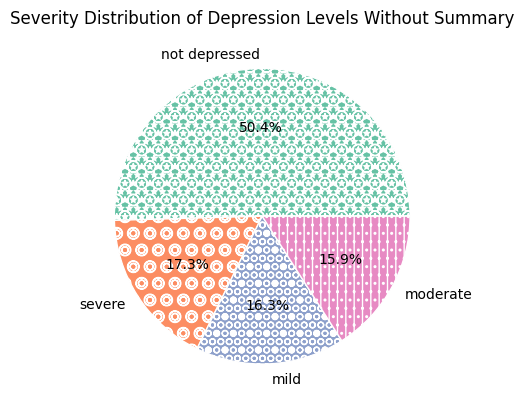

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Get a list of colors from the 'Set2' colormap
colors = sns.color_palette("Set2")

# Assuming severity_distribution is your data
labels = severity_distribution.index

# Your code for plotting the pie chart
fig, ax = plt.subplots()
autopct_format = lambda pct: f"{pct:.1f}%"

ax.pie(severity_distribution, colors=colors,
       wedgeprops={"linewidth": 1, "edgecolor": "white"},
       labels=labels, autopct=autopct_format, hatch=['**O', 'oO', 'O.O', '.||.'])

# Add the title
ax.set_title('Severity Distribution of Depression Levels Without Summary')

# Save and show the plot
plt.savefig('/content/drive/My Drive/Master_Thesis/BASELINE1/without_summary_imbalncing.png')
plt.show()

In [6]:
# labeling to 0,1.....
def labeling(severity_label):
  if severity_label =='not depressed':
    return 0
  elif severity_label =='mild':
    return 1
  elif severity_label =='moderate':
    return 2
  elif severity_label =='severe':
    return 3
df_translated_with_tokenization['labels']=df_translated_with_tokenization['severity_label'].apply(labeling)

In [7]:
df_translated_with_tokenization

,translated_text,is_depression,tokenized_text,text_lemmatized,severity_label,labels
0,we understand that most people who reply immed...,1,"[we, understand, that, most, people, who, repl...","[we, understand, that, most, people, who, repl...",severe,3
1,welcome to r depression s check in post a plac...,1,"[welcome, to, r, depression, s, check, in, pos...","[welcome, to, r, depression, s, check, in, pos...",severe,3
2,anyone else instead of sleeping more when depr...,1,"[anyone, else, instead, of, sleeping, more, wh...","[anyone, else, instead, of, sleep, more, when,...",moderate,2
3,i ve kind of stuffed around a lot in my life d...,1,"[i, ve, kind, of, stuffed, around, a, lot, in,...","[i, ve, kind, of, stuffed, around, a, lot, in,...",moderate,2
4,sleep is my greatest and most comforting escap...,1,"[sleep, is, my, greatest, and, most, comfortin...","[sleep, be, my, great, and, most, comfort, esc...",mild,1
...,...,...,...,...,...,...
7726,is that snow,0,"[is, that, snow]","[be, that, snow]",not depressed,0
7727,moulin rouge mad me cry once again,0,"[moulin, rouge, mad, me, cry, once, again]","[moulin, rouge, mad, me, cry, once, again]",not depressed,0
7728,trying to shout but can t find people on the list,0,"[trying, to, shout, but, can, t, find, people,...","[try, to, shout, but, can, t, find, people, on...",not depressed,0
7729,ughh can t find my red sox hat got ta wear thi...,0,"[ughh, can, t, find, my, red, sox, hat, got, t...","[ughh, can, t, find, my, red, sox, hat, get, t...",not depressed,0


In [8]:
# I droped them because later affter data augmentation I will have new sentences I have to do tha from scratch:
df_without_summary_labeled= df_translated_with_tokenization.drop(columns=['is_depression','tokenized_text','text_lemmatized','severity_label'])
df_without_summary_labeled

,translated_text,labels
0,we understand that most people who reply immed...,3
1,welcome to r depression s check in post a plac...,3
2,anyone else instead of sleeping more when depr...,2
3,i ve kind of stuffed around a lot in my life d...,2
4,sleep is my greatest and most comforting escap...,1
...,...,...
7726,is that snow,0
7727,moulin rouge mad me cry once again,0
7728,trying to shout but can t find people on the list,0
7729,ughh can t find my red sox hat got ta wear thi...,0


[3 2 1 0]


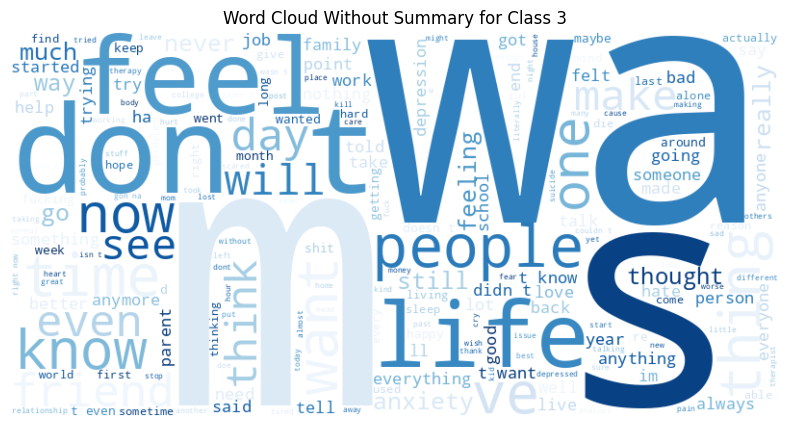

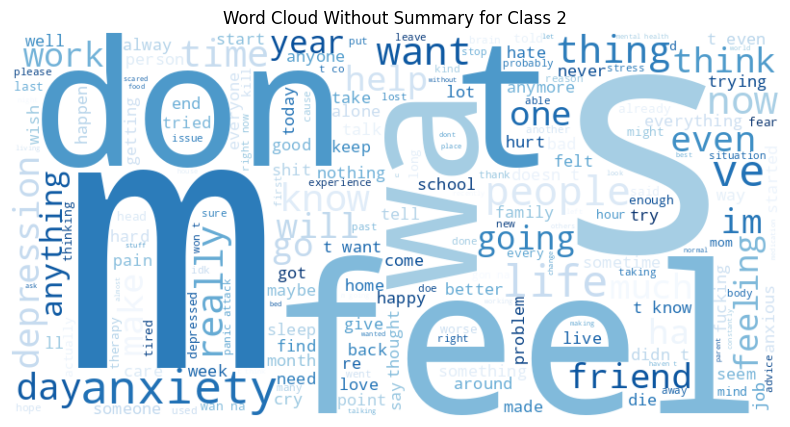

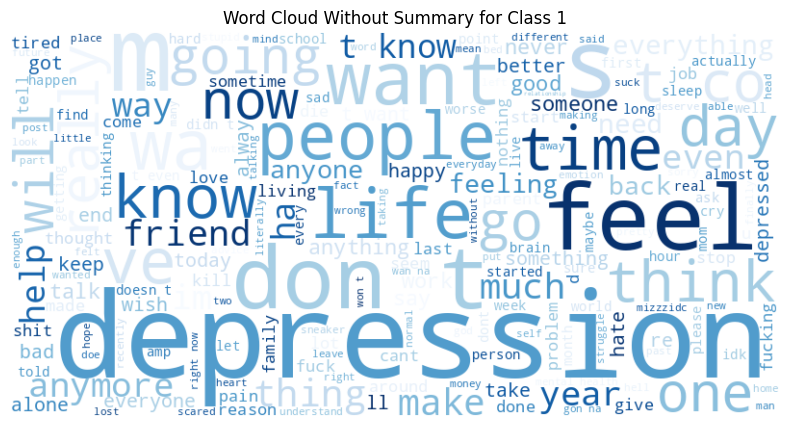

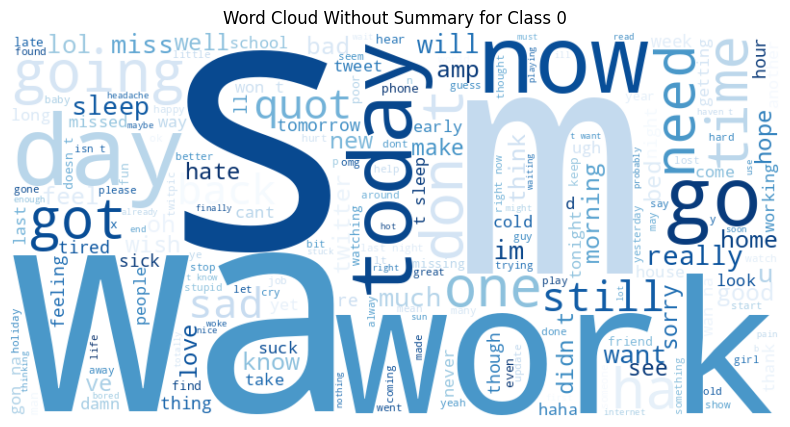

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sample data setup
# Assuming `df_labeled` is your DataFrame with 'generated_summary' as the text and 'labels' as the class
unique_classes = df_without_summary_labeled['labels'].unique()
print(unique_classes)
# Generate a word cloud for each class
for class_name in unique_classes:
# Initialize an empty string to store text data for the current class
    text_data = ""

    # Iterate through each row in the DataFrame
    for index, row in df_without_summary_labeled.iterrows():
        # Check if the current row belongs to the current class
        if row['labels'] == class_name:
            # Concatenate the 'generated_summary' text to the existing text data
            text_data += row['translated_text'] + " "

    # Create a word cloud

    # Create a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color ='white',colormap='Blues').generate(text_data)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud Without Summary for Class {class_name}')
    plt.axis("off")
    plt.savefig('/content/drive/My Drive/Master_Thesis/BASELINE1/Word Cloud Without Summary for Class {}.png'.format(class_name))  # Save the plot with filename based on class number

    plt.show()



In [10]:
df_without_summary_labeled.to_csv('/content/drive/My Drive/Master_Thesis/BASELINE1/df_without_summary_labeled.csv',index=False)

# TF-IDF

In [11]:
df_baseline1_labeled= pd.read_csv('/content/drive/My Drive/Master_Thesis/BASELINE1/df_without_summary_labeled.csv')
df_baseline1_labeled


,translated_text,labels
0,we understand that most people who reply immed...,3
1,welcome to r depression s check in post a plac...,3
2,anyone else instead of sleeping more when depr...,2
3,i ve kind of stuffed around a lot in my life d...,2
4,sleep is my greatest and most comforting escap...,1
...,...,...
7726,is that snow,0
7727,moulin rouge mad me cry once again,0
7728,trying to shout but can t find people on the list,0
7729,ughh can t find my red sox hat got ta wear thi...,0


In [12]:
df_baseline1_labeled.isnull().sum()

translated_text    0
labels             0
dtype: int64

In [13]:
X = df_baseline1_labeled['translated_text']
y = df_baseline1_labeled['labels']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [15]:
X_train.nunique()

6125

In [16]:
y_test.value_counts()

labels
0    780
3    267
1    253
2    247
Name: count, dtype: int64

In [17]:
import re
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# Import NLTK English stopwords
stop_words = set(stopwords.words('english'))

# Define lemmatization function
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()

    # Convert POS tag to WordNet format
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    # Lemmatize tokens
    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]

    # Return lemmatized tokens as a list
    return lemmas

# Custom preprocessing function
def preprocessing(text):
    lower_text = text.lower()
    punctuation_free = "".join([chars for chars in lower_text if chars not in string.punctuation])
    remove_urls = re.sub(r'http\S+', '', punctuation_free)
    remove_digits = re.sub(r'\d', '', remove_urls)
    tokenized_text = word_tokenize(remove_digits)

    # Remove stop words
    filtered_tokens = [token for token in tokenized_text if token not in stop_words]

    # Lemmatize tokens
    lemmatized_tokens = lemmatize_tokens(filtered_tokens)

    return lemmatized_tokens

# Text preprocessing and vectorization pipeline
preprocess_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        tokenizer=preprocessing,  # Custom preprocessing function
        stop_words='english'      # Remove English stopwords
    ))
])

# Fit the pipeline to your training data (X_train and y_train should be defined earlier)
preprocess_pipeline.fit(X_train, y_train)

# Transform your data using the pipeline
X_train_tfidf = preprocess_pipeline.transform(X_train)
X_test_tfidf = preprocess_pipeline.transform(X_test)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['make', 'u'] not in stop_words.
  warnings.warn(


In [18]:
!pip install xgboost==1.4.0


     ━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/166.7 MB 78.7 MB/s eta 0:00:02
ERROR: Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/urllib3/response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/urllib3/response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/cachecontrol/filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "/usr/lib/python3.10/http/client.py", line 466, in read
    s = self.fp.read(amt)
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "/usr/lib/python3.10/ssl.py", line 1303, in recv_into
    return self.read(nbytes, bu

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report
import xgboost as xgb

# Compute sample weights for handling class imbalance
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Train the XGBoost model with sample weights and default parameters
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_tfidf, y_train, sample_weight=sample_weights)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test_tfidf)

# Generate the classification report
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       780
           1       0.74      0.78      0.76       253
           2       0.73      0.68      0.71       247
           3       0.73      0.65      0.69       267

    accuracy                           0.84      1547
   macro avg       0.78      0.77      0.77      1547
weighted avg       0.83      0.84      0.83      1547



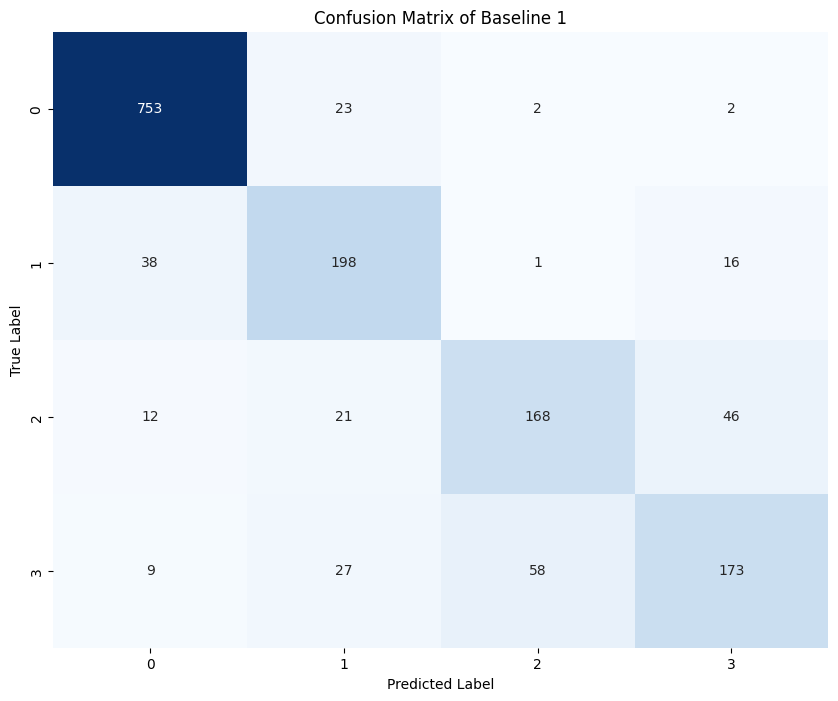

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Baseline 1')
plt.savefig('/content/drive/My Drive/Master_Thesis/BASELINE1/Confusion Matrix of Baseline 1.png')
plt.show()

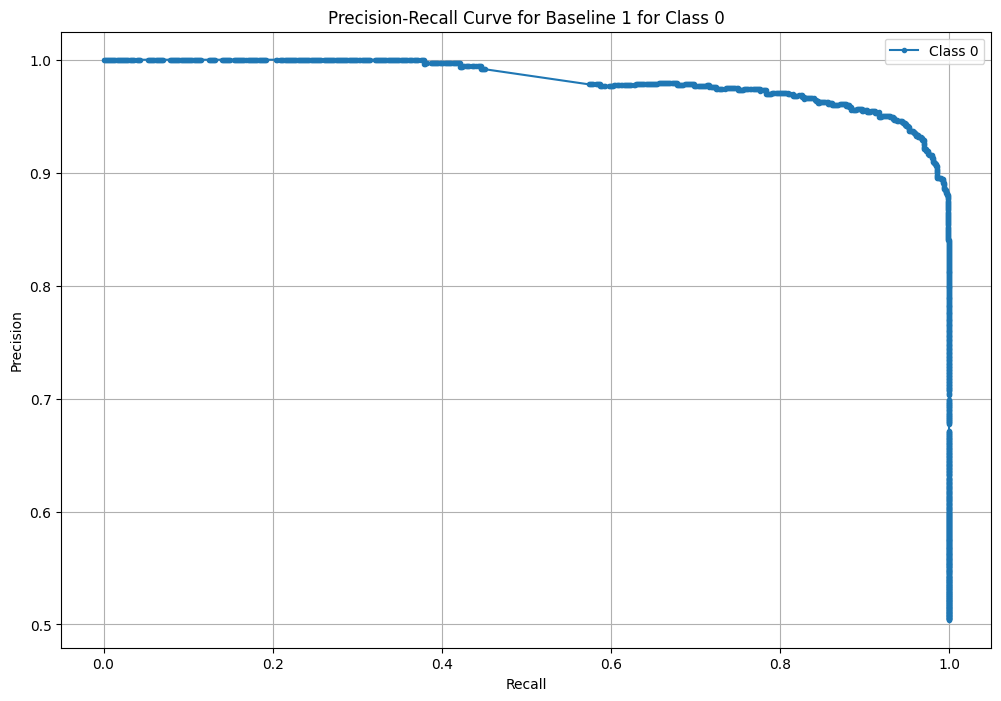

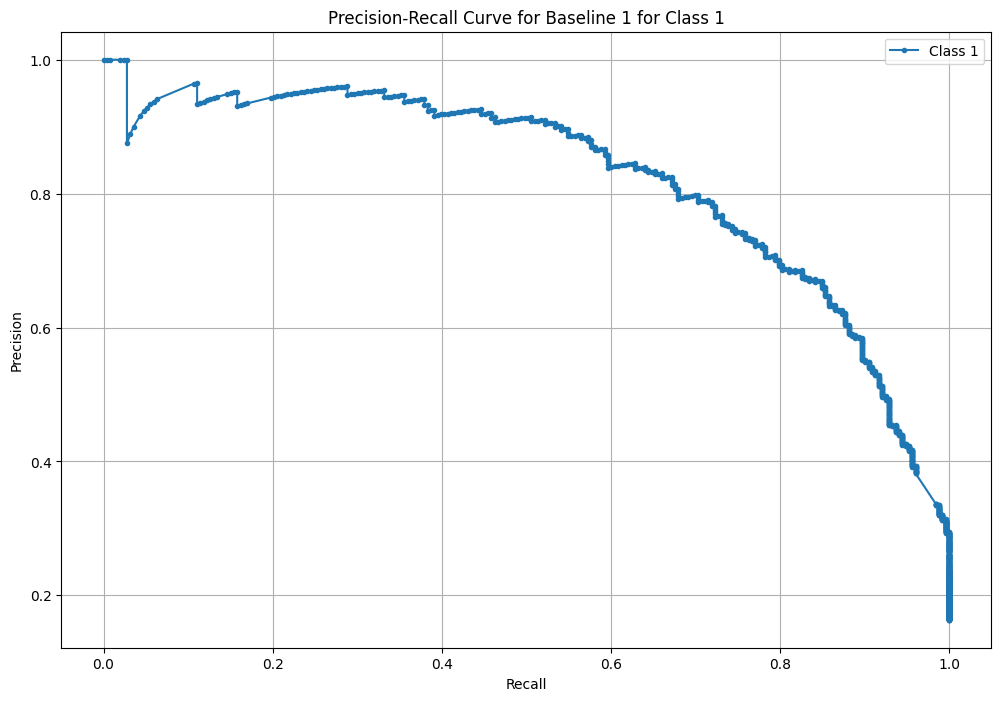

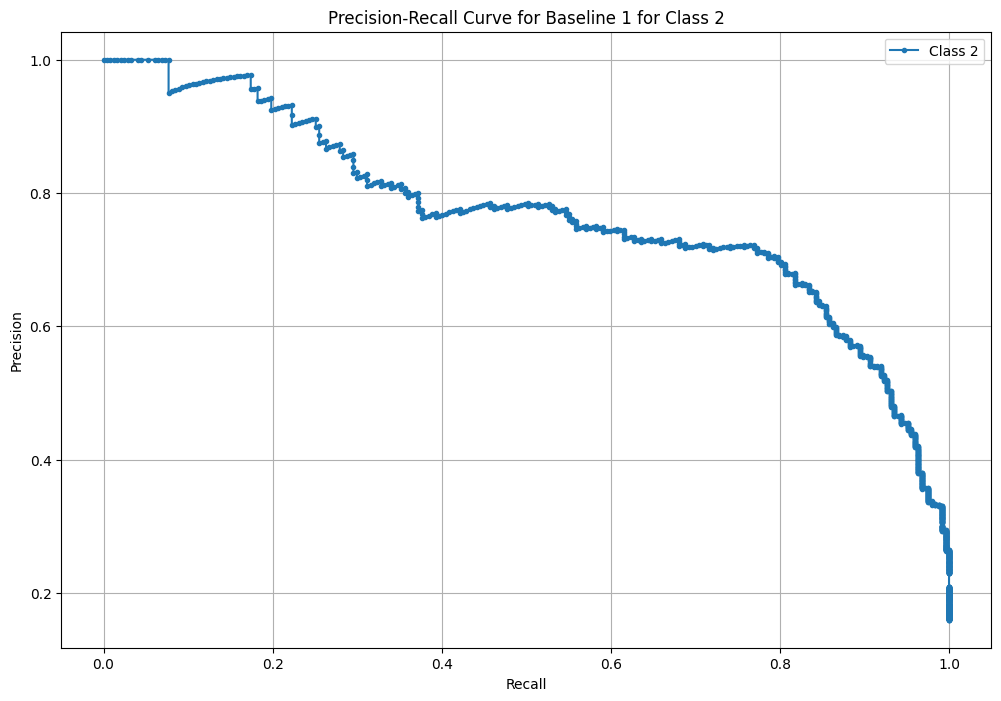

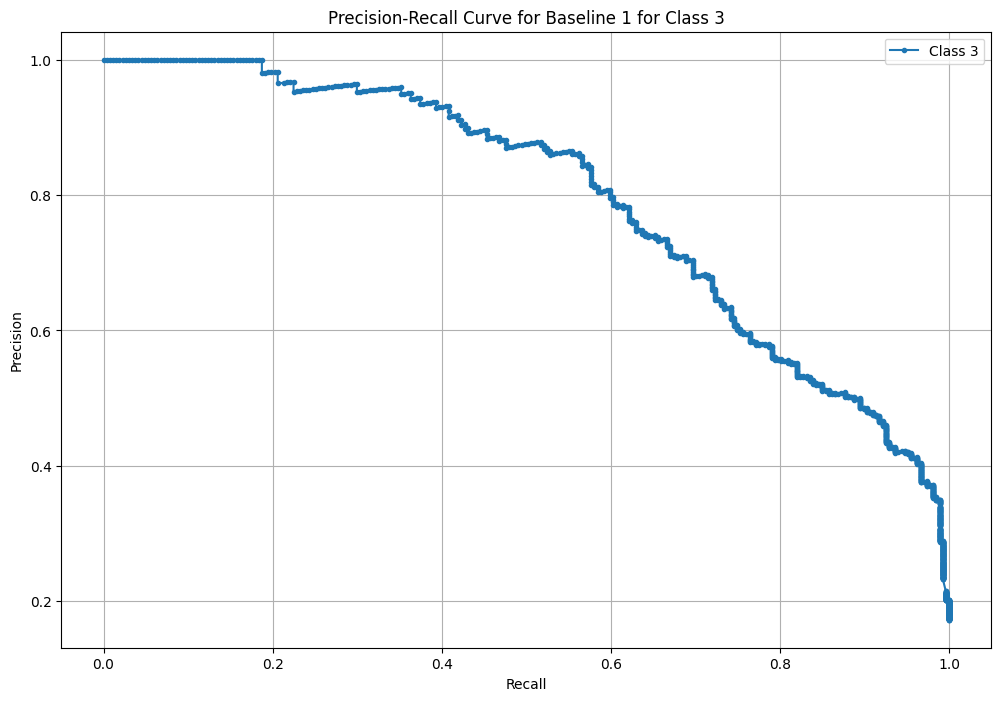

In [21]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, classification_report
from matplotlib import pyplot as plt
import nltk
import numpy as np
# Binarize the true labels
# Predict probabilities for the test set
y_probas = xgb_model.predict_proba(X_test_tfidf)

# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Compute precision, recall, and thresholds for each class
precisions = dict()
recalls = dict()
thresholds = dict()
for i in range(len(np.unique(y_test))):
    precisions[i], recalls[i], thresholds[i] = precision_recall_curve(y_test_bin[:, i], y_probas[:, i])

# Plot Precision-Recall Curve for each class separately
for i in range(len(np.unique(y_test))):
    plt.figure(figsize=(12, 8))
    plt.plot(recalls[i], precisions[i], marker='.', label='Class {}'.format(i))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for Baseline 1 for Class {}'.format(i))
    plt.legend()
    plt.grid(True)
    plt.savefig('/content/drive/My Drive/Master_Thesis/BASELINE1/Precision-Recall Curve for Baseline 1 for Class {}.png'.format(i))  # Save the plot with filename based on class number
    plt.show()

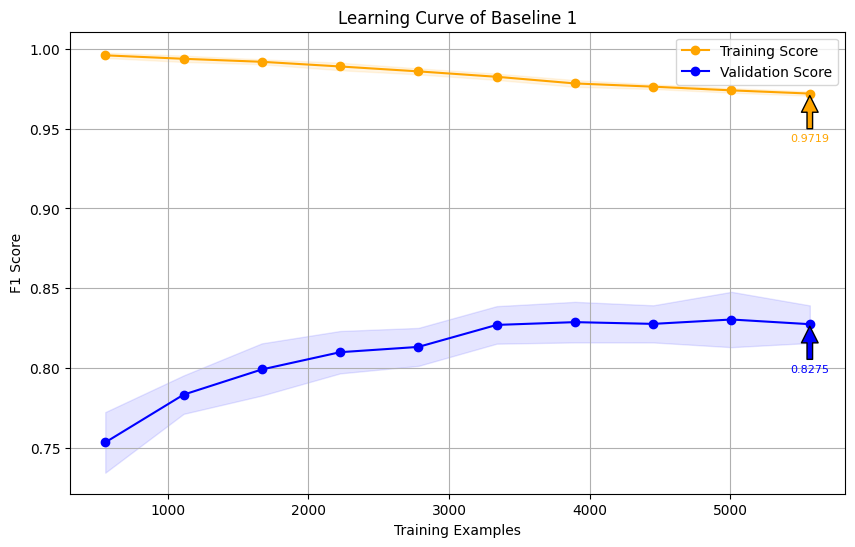

In [23]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Assuming best_xgb_classifier is defined and trained
# Plot learning curve
train_sizes, train_scores, valid_scores = learning_curve(
    xgb_model, X_train_tfidf, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='f1_weighted', cv=10, shuffle=True)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Print final F1 scores for training and validation
final_train_f1_mean = train_scores_mean[-1]
final_valid_f1_mean = valid_scores_mean[-1]

plt.figure(figsize=(10, 6))
plt.title('Learning Curve of Baseline 1')
plt.xlabel('Training Examples')
plt.ylabel('F1 Score')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="orange")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1, color="blue")
plt.plot(train_sizes, train_scores_mean, 'o-', color="orange", label="Training Score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="blue", label="Validation Score")
# Add annotations for the final F1 scores
plt.annotate(f'{final_train_f1_mean:.4f}',
             xy=(train_sizes[-1], final_train_f1_mean),
             xytext=(train_sizes[-1], final_train_f1_mean- 0.03),
             arrowprops=dict(facecolor='orange', shrink=0.05),
             fontsize=8, color='orange', ha='center')

plt.annotate(f'{final_valid_f1_mean:.4f}',
             xy=(train_sizes[-1], final_valid_f1_mean),
             xytext=(train_sizes[-1], final_valid_f1_mean- 0.03),
             arrowprops=dict(facecolor='blue', shrink=0.05),
             fontsize=8, color='blue', ha='center')

plt.legend(loc="best")
plt.grid()
plt.savefig('/content/drive/My Drive/Master_Thesis/BASELINE1/learning_curve_baseline1.png')  # Save the plot with filename based on class number

plt.show()